## Decision trees example

Continuous output example: A prediction model that states the motor mass value from references of motor torque. Different decision trees are created according to the required selection criteria.

**Step 1**: Import the required libraries.

In [1]:
# import numpy package for arrays and stuff 
import numpy as np 

# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 

# import pandas for importing csv files 
import pandas as pd 


Import the file containing the decision trees algorithms

In [2]:
import sys
sys.path.insert(0, 'decision trees')

from predicted_values_DT import *

**Step 2** : Multiinput decision tree

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

path='./Batteries/'
df_bat = pd.read_csv(path+'Non-Dominated-Batteries.csv', sep=';')
df_X = df_bat[['Capacity_mAh','Voltage_V']] # we select the first five rows
df_y = df_bat[['Weight_g']]


Tree structure

In [ ]:
from IPython.display import Image  
from io import StringIO
import pydot  
from sklearn import tree

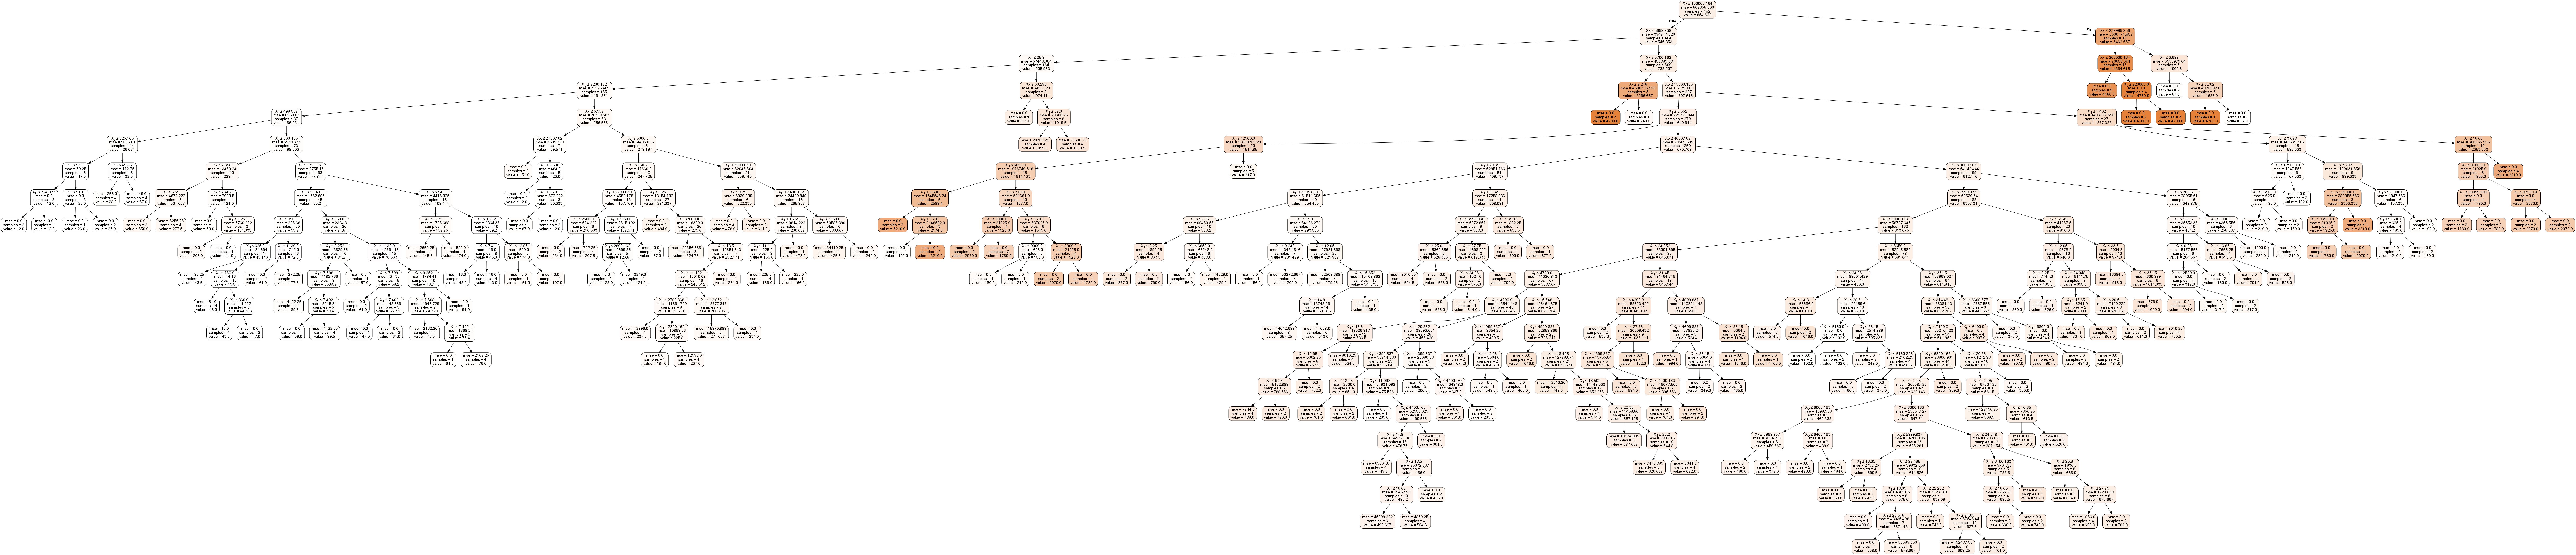

In [6]:


dot_data = StringIO()  
tree.export_graphviz(DT_handling(df_bat[['Capacity_mAh','Voltage_V']],df_bat[['Weight_g']],['next','next']), out_file=dot_data, 
    filled=True, rounded=True,
    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

3D plot - average values

<IPython.core.display.Javascript object>


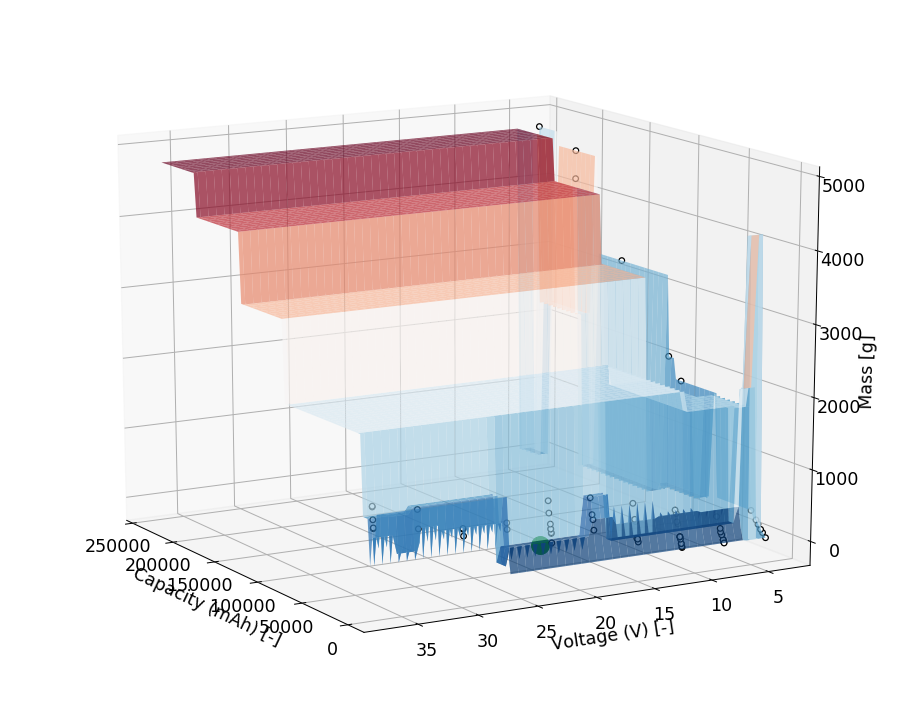

In [11]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


%matplotlib notebook 
# read dataframe values

X = (df_bat[['Capacity_mAh','Voltage_V']].values)
y1 = (df_bat['Weight_g'].values)

# extracting columns from X
Cbat_col=X[:,0] 
Vbat_col=X[:,1]

#meshgrid 3D for plot

xx1,xx2= np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 100), 
                       np.linspace(X[:,1].min(), X[:,1].max(), 100))
positions = np.vstack([xx1.ravel(), xx2.ravel()]).T



#create the 3D axis 
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-210, elev=15)


xp = np.reshape(positions[:,0], (100, 100))
yp = np.reshape(positions[:,1], (100, 100))
zp = np.reshape((DT_handling((X),(y1),['next','next'],1000).predict((positions))), (100, 100))


# ax.scatter(positions[:,0], positions[:,1], average_DT(df[['Tnom_Nm','Kt_Nm_A']],df[['r_omn']],positions), color='red', alpha=1.0, facecolor='white')
ax.plot_surface(xp, yp, zp, cmap=plt.cm.RdBu_r, alpha=0.7, linewidth=1)
ax.scatter(Cbat_col, Vbat_col, y1, color='black', alpha=1.0, facecolor='white')
ax.scatter3D(np.array([2958.]), np.array([23.2]), np.exp(DT_handling(np.log(X),np.log(y1),['next','next'],100000).predict(np.log(np.array([[2958,23.2]])))), s=200,color='green')


#axis labels
ax.set_xlabel('Capacity (mAh) [-]',fontsize=14)
ax.set_ylabel('Voltage (V) [-]',fontsize=14)
ax.set_zlabel('Mass [g]',fontsize=14)

plt.grid()

plt.tick_params(axis = 'both', labelsize = 14)